# 훈련 세트와 테스트 세트

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/rickiepark/hg-mldl/blob/master/2-1.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />구글 코랩에서 실행하기</a>
  </td>
</table>

## 훈련 세트와 테스트 세트

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

In [2]:
MultiCopter_df = pd.read_csv("MultiCopter.csv")

In [3]:
MultiCopterLength = np.array(MultiCopter_df['Length'])
MultiCopterWeight = np.array(MultiCopter_df['Weight'])

In [4]:
type(MultiCopterLength)

numpy.ndarray

In [5]:
type(MultiCopterWeight)

numpy.ndarray

In [6]:
from sklearn.model_selection import train_test_split

# 훈련 세트와 테스트 세트로 나눕니다
train_input, test_input, train_target, test_target = train_test_split(
    MultiCopterLength, MultiCopterWeight, random_state=42)
# 훈련 세트와 테스트 세트를 2차원 배열로 바꿉니다
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)

In [7]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor(n_neighbors=3)
# k-최근접 이웃 회귀 모델을 훈련합니다.
knr.fit(train_input, train_target)

KNeighborsRegressor(n_neighbors=3)

In [8]:
print(knr.predict([[2500]]))

[17340.]


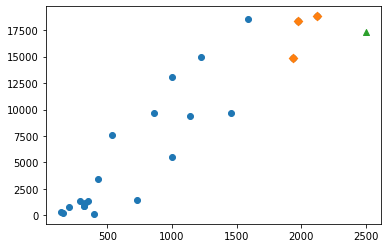

In [9]:
# 50cm 농어의 이웃을 구합니다
distances, indexes = knr.kneighbors([[2500]])

# 훈련 세트의 산점도를 그립니다
plt.scatter(train_input, train_target)
# 훈련 세트 중에서 이웃 샘플만 다시 그립니다
plt.scatter(train_input[indexes], train_target[indexes], marker='D')
# 2500cm 회전익 데이터
plt.scatter(2500, 17340, marker='^')
plt.show()

In [10]:
print(np.mean(train_target[indexes]))

17340.0


In [11]:
print(knr.predict([[2500]]))

[17340.]


# 선형회귀

In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
lr = LinearRegression()
# 선형 회귀 모델 훈련
lr.fit(train_input, train_target)

LinearRegression()

In [14]:
# 5000cm 회전익에 대한 예측
print(lr.predict([[2500]]))

[23397.03083571]


In [15]:
print(lr.coef_, lr.intercept_)

[9.92659744] -1419.462768425973


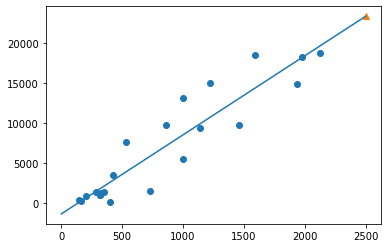

In [16]:
# 훈련 세트의 산점도를 그립니다
plt.scatter(train_input, train_target)
# 1에서 2500까지 1차 방정식 그래프를 그립니다
plt.plot([1, 2500], [1*lr.coef_+lr.intercept_, 2500*lr.coef_+lr.intercept_])
# 2500cm 회전익 데이터
plt.scatter(2500, 23397, marker='^')
plt.show()

#다항회귀

In [17]:
train_poly = np.column_stack((train_input ** 2, train_input))
test_poly = np.column_stack((test_input ** 2, test_input))

In [18]:
print(train_poly.shape, test_poly.shape)

(22, 2) (8, 2)


In [19]:
lr = LinearRegression()
lr.fit(train_poly, train_target)

print(lr.predict([[2500**2, 2500]]))

[20787.69784753]


In [20]:
print(lr.coef_, lr.intercept_)

[-1.6094546e-03  1.3354711e+01] -2539.9882906632256


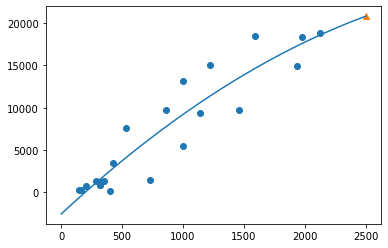

In [21]:
# 구간별 직선을 그리기 위해 1에서 2500까지 정수 배열을 만듭니다
point = np.arange(1, 2501)
# 훈련 세트의 산점도를 그립니다
plt.scatter(train_input, train_target)
# 1에서 2500까지 2차 방정식 그래프를 그립니다
plt.plot(point, -0.001609*point**2 + 13.3547*point - 2539.98829)
# 2500cm 회전익 데이터
plt.scatter([2500], [20787], marker='^')
plt.show()